### Importing libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading and studying data

In [53]:
data= pd.read_csv("Clustering_Data.csv")

data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [54]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [55]:
X= data.drop('Customer_Segment', axis= 1)
y= data['Customer_Segment']

### Using sklearn to find the best dimension

In [56]:
X_centred= X - X.mean(axis= 0)
U, s, V= np.linalg.svd(X_centred)   # For this task, we are only concerned with 'V'

c1= V.T[:, 0]
c2= V.T[:, 1]

### **Explanation:**

This Python code snippet performs **Principal Component Analysis (PCA)** using **Singular Value Decomposition (SVD)** from NumPy. Let's break it down step by step:

---

### **Step 1: Centering the Data**
```python
X_centered = X - X.mean(axis=0)
```
- **Purpose**: Before applying PCA, the dataset \(X\) is **centered** by subtracting the mean of each feature (column).  
- This ensures that the data has a mean of zero along each feature, which is a crucial step for PCA.

---

### **Step 2: Applying Singular Value Decomposition (SVD)**
```python
U, s, V = np.linalg.svd(X_centered)
```
- **What is SVD?**  
  SVD decomposes the centered matrix \(X_{\text{centered}}\) as:  
  \[
  X_{\text{centered}} = U s V^T
  \]
  where:
  - \(U\) (left singular vectors) is an orthogonal matrix.
  - \(s\) (singular values) is a diagonal matrix representing the variance explained by each component.
  - \(V\) (right singular vectors) contains the principal components (PCs) in its rows.

- **Key Insight**:  
  - The rows of \(V\) are the **principal component directions** (eigenvectors of the covariance matrix).
  - The **first row of \(V\)** corresponds to the **first principal component** (PC1).
  - The **second row of \(V\)** corresponds to the **second principal component** (PC2).

---

### **Step 3: Extracting the First Two Principal Components**
```python
c1 = V.T[:, 0]
c2 = V.T[:, 1]
```
- **Why Transpose \(V.T\)?**  
  - \(V\) has principal components as **rows**.
  - To extract them as **column vectors**, we take its **transpose** (\(V^T\)).
  
- **Extracting Principal Components**:
  - `c1 = V.T[:, 0]` → **First principal component (PC1)**.
  - `c2 = V.T[:, 1]` → **Second principal component (PC2)**.

---

### **Summary**
- The code **centers** the data.
- It applies **SVD** to extract principal components.
- The **first two principal components** (PC1 and PC2) are extracted from \(V^T\).

This process is equivalent to **PCA**, but instead of using covariance matrix eigen decomposition, it leverages **SVD**, which is numerically more stable. 🚀

**Now the question comes: Why do we take the transpose of V here?**

Let's clarify why we take the **transpose of \(V\)** when extracting the principal components.

---

### **1. Understanding the Shape of \(V\) in SVD**
When applying **Singular Value Decomposition (SVD)**:  
\[
X_{\text{centered}} = U s V^T
\]
- \( X_{\text{centered}} \) is an \( m \times n \) matrix (**m samples, n features**).
- \( V \) is an **\( n \times n \) matrix**, where:
  - **Each row** of \( V \) is a **principal component** (PC).
  - The **first row** corresponds to **PC1**.
  - The **second row** corresponds to **PC2**.
  
  This means \( V^T \) is an **\( n \times n \) matrix**, where:
  - **Each column** is a **principal component vector**.

---

### **2. Why Take the Transpose?**
- **\( V \)** (from `np.linalg.svd()`) has **PCs as rows**.
- We need the **PCs as column vectors** to work with them properly.
- Taking the **transpose \( V^T \)** converts the PCs from **rows → columns**.

Now, when we write:
```python
c1 = V.T[:, 0]  # First principal component (PC1)
c2 = V.T[:, 1]  # Second principal component (PC2)
```
- `V.T[:, 0]` → The **first column** of \( V^T \), which corresponds to the **first principal component (PC1)**.
- `V.T[:, 1]` → The **second column** of \( V^T \), which corresponds to the **second principal component (PC2)**.

---

### **3. Alternative Way Without Transposing**
Instead of:
```python
c1 = V.T[:, 0]
c2 = V.T[:, 1]
```
You could directly take:
```python
c1 = V[0, :]  # First row of V (PC1)
c2 = V[1, :]  # Second row of V (PC2)
```
However, the convention in PCA is to represent each **principal component as a column vector**, so we use the transposed form.

---

### **Key Takeaways**
- \( V \) from SVD gives **PCs as rows**.
- **Transpose \( V \)** to get **PCs as column vectors**.
- This ensures `c1` and `c2` are correctly shaped **eigenvectors** of the data.

*- Explanation generated by ChatGPT*


In [57]:
# Projecting the dataset onto the plane defined by the first two principal components

W2= V.T[:, :2]
X2D= X_centred.dot(W2)

In [58]:
from sklearn.decomposition import PCA

pca= PCA(n_components= 2)
X2D= pca.fit_transform(X)

pca.components_.T       # displays the principal components of the dataset

array([[ 1.65926472e-03,  1.20340617e-03],
       [-6.81015556e-04,  2.15498184e-03],
       [ 1.94905742e-04,  4.59369254e-03],
       [-4.67130058e-03,  2.64503930e-02],
       [ 1.78680075e-02,  9.99344186e-01],
       [ 9.89829680e-04,  8.77962152e-04],
       [ 1.56728830e-03, -5.18507284e-05],
       [-1.23086662e-04, -1.35447892e-03],
       [ 6.00607792e-04,  5.00440040e-03],
       [ 2.32714319e-03,  1.51003530e-02],
       [ 1.71380037e-04, -7.62673115e-04],
       [ 7.04931645e-04, -3.49536431e-03],
       [ 9.99822937e-01, -1.77738095e-02]])

In [59]:
print(pca.explained_variance_ratio_)

[0.99809123 0.00173592]


➡️ Variance measures how spread out the data points are from the mean in a dataset. It quantifies the degree of variability in the data.

➡️ The one-line code above tells that 99.809123% of the dataset's variance lies along the first axis, and 0.173592% lies along the second axis. This leaves 0.017285% for the third axis, so it's reasonable to assume that it probably carries little information.

In [60]:
# Choosing the right number of dimensions

pca= PCA()  # creates a PCA object without reducing dimensionality by not specifying the number of components
pca.fit(X)  # the attribute 'explained_variance_ratio_' now contains the variance ratio of ea7ch principal component of X
cumsum= np.cumsum(pca.explained_variance_ratio_) # computes the cumulative sum of the variance ratios
d= np.argmax(cumsum >= 0.95) + 1

"""
For example: 

if pca.explained_variance_ratio_= [0.5, 0.3, 0.15, 0.05]
then cumsum= [0.5, 0.8, 0.95, 1.0]

which means that: 

- The first component explains 50% of the variance.
- The first two components explain 80% of the variance.
- The first three components explain 95% of the variance.
"""

print("Chosen dimension: ", d)

Chosen dimension:  1


Line: d= np.argmax(cumsum >= 0.95) + 1

Explanation: 

1. cumsum >= 0.95 creates a Boolean array indicating where the cumulative variance first reaches or exceeds 95%.

For eg.- if cumsum= [0.5, 0.8, 0.95, 1.0], then the list [False, False, True, True] gets returned.

2. np.argmax(cumsum >= 0.95) finds the index of the first True value.

In this example, the index is 2 (corresponding to the 3rd principal component).

3. We add 1 to convert from a zero-based index to the actual number of components.

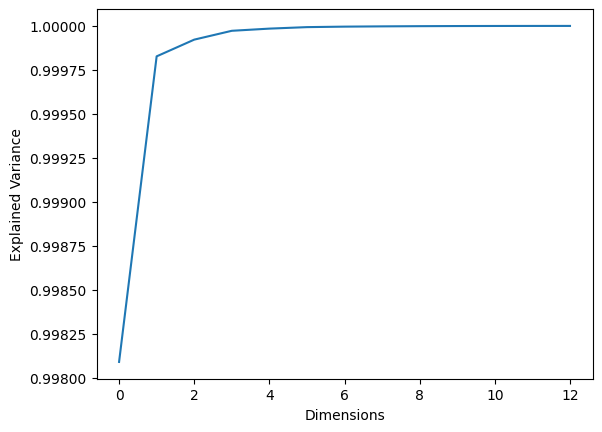

In [61]:
# Plotting the explained variance as a function of the number of dimensions

import matplotlib.pyplot as plt

plt.plot(cumsum)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.show()

➡️ Here, the elbow occurs clearly at 'Dimensions'= 1 or d= 1

That means the first principal component (PC1) alone explains most of the variance in our dataset! 🚀

### Methods for making the Hyperline

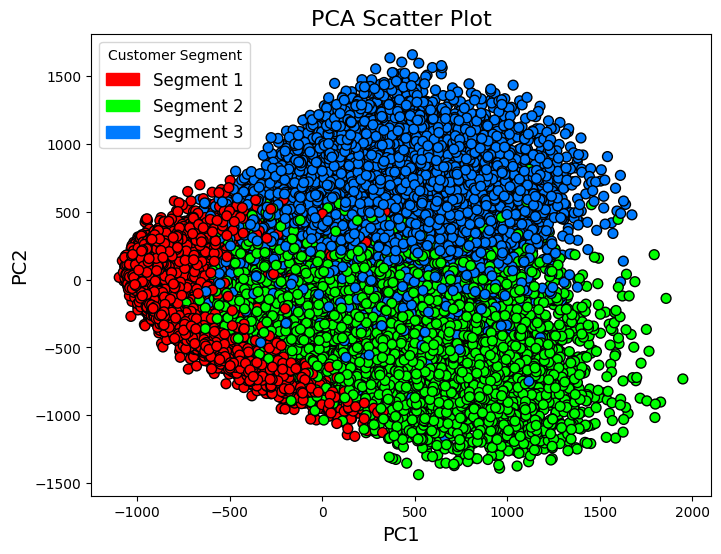

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.patches import Patch

# Define BRIGHT custom colors
color_map = {1: '#FF0000',  # Bright Red
             2: '#00FF00',  # Neon Green
             3: '#007BFF'}  # Vivid Blue

labels = {1: "Segment 1", 2: "Segment 2", 3: "Segment 3"}  # Legend labels

# Convert labels to corresponding bright colors
colors = [color_map[label] for label in y_filtered]

# PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X_filtered)

# Scatter plot with larger points and no transparency
plt.figure(figsize=(8, 6))  # Bigger figure size
plt.scatter(X2D[:, 0], X2D[:, 1], c=colors, s=50, edgecolors='black')

# Custom legend with bright colors
legend_handles = [Patch(color=color_map[i], label=labels[i]) for i in color_map]
plt.legend(handles=legend_handles, title="Customer Segment", fontsize=12)

# Labels and title
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.title("PCA Scatter Plot", fontsize=16)

# Clean up the graph
plt.grid(False)  # Remove grid lines for a cleaner look
plt.show()

